# Computer Lab 5: Biologically Informed Neural Networks (BINNs)

Welcome to the practical session of [Data-Driven Life Sciences course module 5](https://ddls.aicell.io/course/ddls-2025/module-5/lab/).

In this lab you will work with Biologically Informed Neural Networks (BINNs), a deep learning architecture that integrates biological pathway knowledge into the structure of neural networks. You will learn how to build, train, and interpret BINNs using the `binn` Python [package](https://github.com/InfectionMedicineProteomics/BINN) and create your own [MCP](https://ddls.aicell.io/course/ddls-2025/module-4/lab/#what-is-mcp) (Model-Context-Protocol) tools for that. 

---

<img src="https://raw.githubusercontent.com/InfectionMedicineProteomics/BINN/main/docs/img/logo.png" height="150" align="right" style="height:240px">

Acknowledgements: This notebook is based on the [BINN v0.1.0 notebook](https://github.com/InfectionMedicineProteomics/BINN/blob/main/colab/BINN_colab.ipynb) and [BINN documentation](https://infectionmedicineproteomics.github.io/BINN/).

[Erik Hartman, Aaron M. Scott, Christofer Karlsson, Tirthankar Mohanty, Suvi T. Vaara, Adam Linder, Lars Malmström & Johan Malmström. Interpreting biologically informed neural networks for enhanced proteomic biomarker discovery and pathway analysis
*Nature Communications*, 2023](https://www.nature.com/articles/s41467-023-41146-4)

---

## Setup

### Save the notebook to your Module 5 folder in Google Drive

Before you start, copy this notebook to your Google Drive:

`File` -> `Save a copy in Drive`

(You can close the other tab with the original notebook.)

Next, move the copied notebook to your Module 5 folder in Google Drive:

`File` -> `Move` -> Go up to `My Drive` -> Select your `DDLS-Course` folder -> Create a new folder named `Module5` -> `Select folder`

### Runtime

You can run this notebook with a **CPU** runtime. A GPU runtime is not required because of the small model size.

### Mount Google Drive Folder

Mounting your Google Drive folder allows your Colab notebook to access files stored in your Google Drive. This is useful for loading datasets, saving results, or accessing other files you need for your work.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

If you copied and saved the notebook correctly, you should now see this notebook in your Google Drive under `/content/drive/MyDrive/DDLS-Course/Module5/`.

In [ ]:
!ls -lh /content/drive/MyDrive/DDLS-Course/Module5/

### Working with Gemini CLI in Google Colab

Open the terminal in Google Colab and run the following commands to install Gemini CLI:

```bash
curl -o- https://raw.githubusercontent.com/nvm-sh/nvm/v0.40.3/install.sh | bash
source /root/.bashrc
nvm install 21
nvm use 21
npm install -g @google/gemini-cli
```

**Start Gemini CLI**

To start a Gemini chat session, first change your working directory to your Module 5 folder in Google Drive:

```bash
cd /content/drive/MyDrive/DDLS-Course/Module5/
```

and then run the `gemini` command:

```bash
gemini
```

**Save Your Gemini Chat History**

Remember to regularly save your Gemini chat history to avoid losing records of your work. In the Gemini CLI, run:
```
/chat save computer-lab-5
```

**Copy the Checkpoint File**

Ask Gemini to copy the checkpoint file from the temporary Gemini directory to your Google Drive folder while you are still in the Gemini CLI session:
```
Run this command: `cp /root/.gemini/tmp/*/checkpoint-computer-lab-5.json .`
```

You can do so after every small or large step of your work. This will prevent the loss of your chat history if runtime in Google Colab disconnects and gets reset.

If you have already closed the Gemini CLI session, run this command to copy the checkpoint file to your Google Drive folder:
```bash
cd /content/drive/MyDrive/DDLS-Course/Module5/
cp /root/.gemini/tmp/*/checkpoint-computer-lab-5.json .
```

**Load Your Gemini Chat History**

To load your previously saved Gemini chat history, run the following command in the Gemini CLI:
```
/chat load computer-lab-5
```

**General tips when working on large data files**

Don’t let Gemini read the entire files. Instead use preview commands like `head` or `tail`. Also avoid printing details and always keep the outputs concise.

It can help to add instructions like this to your GEMINI.md file.

---

# Part I - Getting Started with BINNs

### Introduction to BINNs

Biological systems are complex, and modeling them requires methods that can capture this complexity while still being interpretable. **Biologically Informed Neural Networks (BINNs)** are designed with this goal in mind.

A BINN is built from a **graph** that defines how the layers of the network are connected and how each node is annotated. The graph can come from public resources such as [Reactome](https://reactome.org/), [KEGG](https://www.genome.jp/kegg/), [Gene Ontology](http://geneontology.org/), or from your own curated pathway data.

The **input layer** of a BINN represents the features you want to study—for example, gene expression or protein abundance—which are mapped to the chosen pathway graph. Once the network is trained, its predictions can be interpreted using **SHAP values**, which provide an importance score for each node. This allows you to pinpoint which genes, proteins, or pathways contribute most to the classification task.

To support interpretation, the BINN package also includes plotting functions to visualize node importance directly on the network.

Feel free to take a look at the corresponding [paper](https://www.nature.com/articles/s41467-023-41146-4) for more information about BINNs.

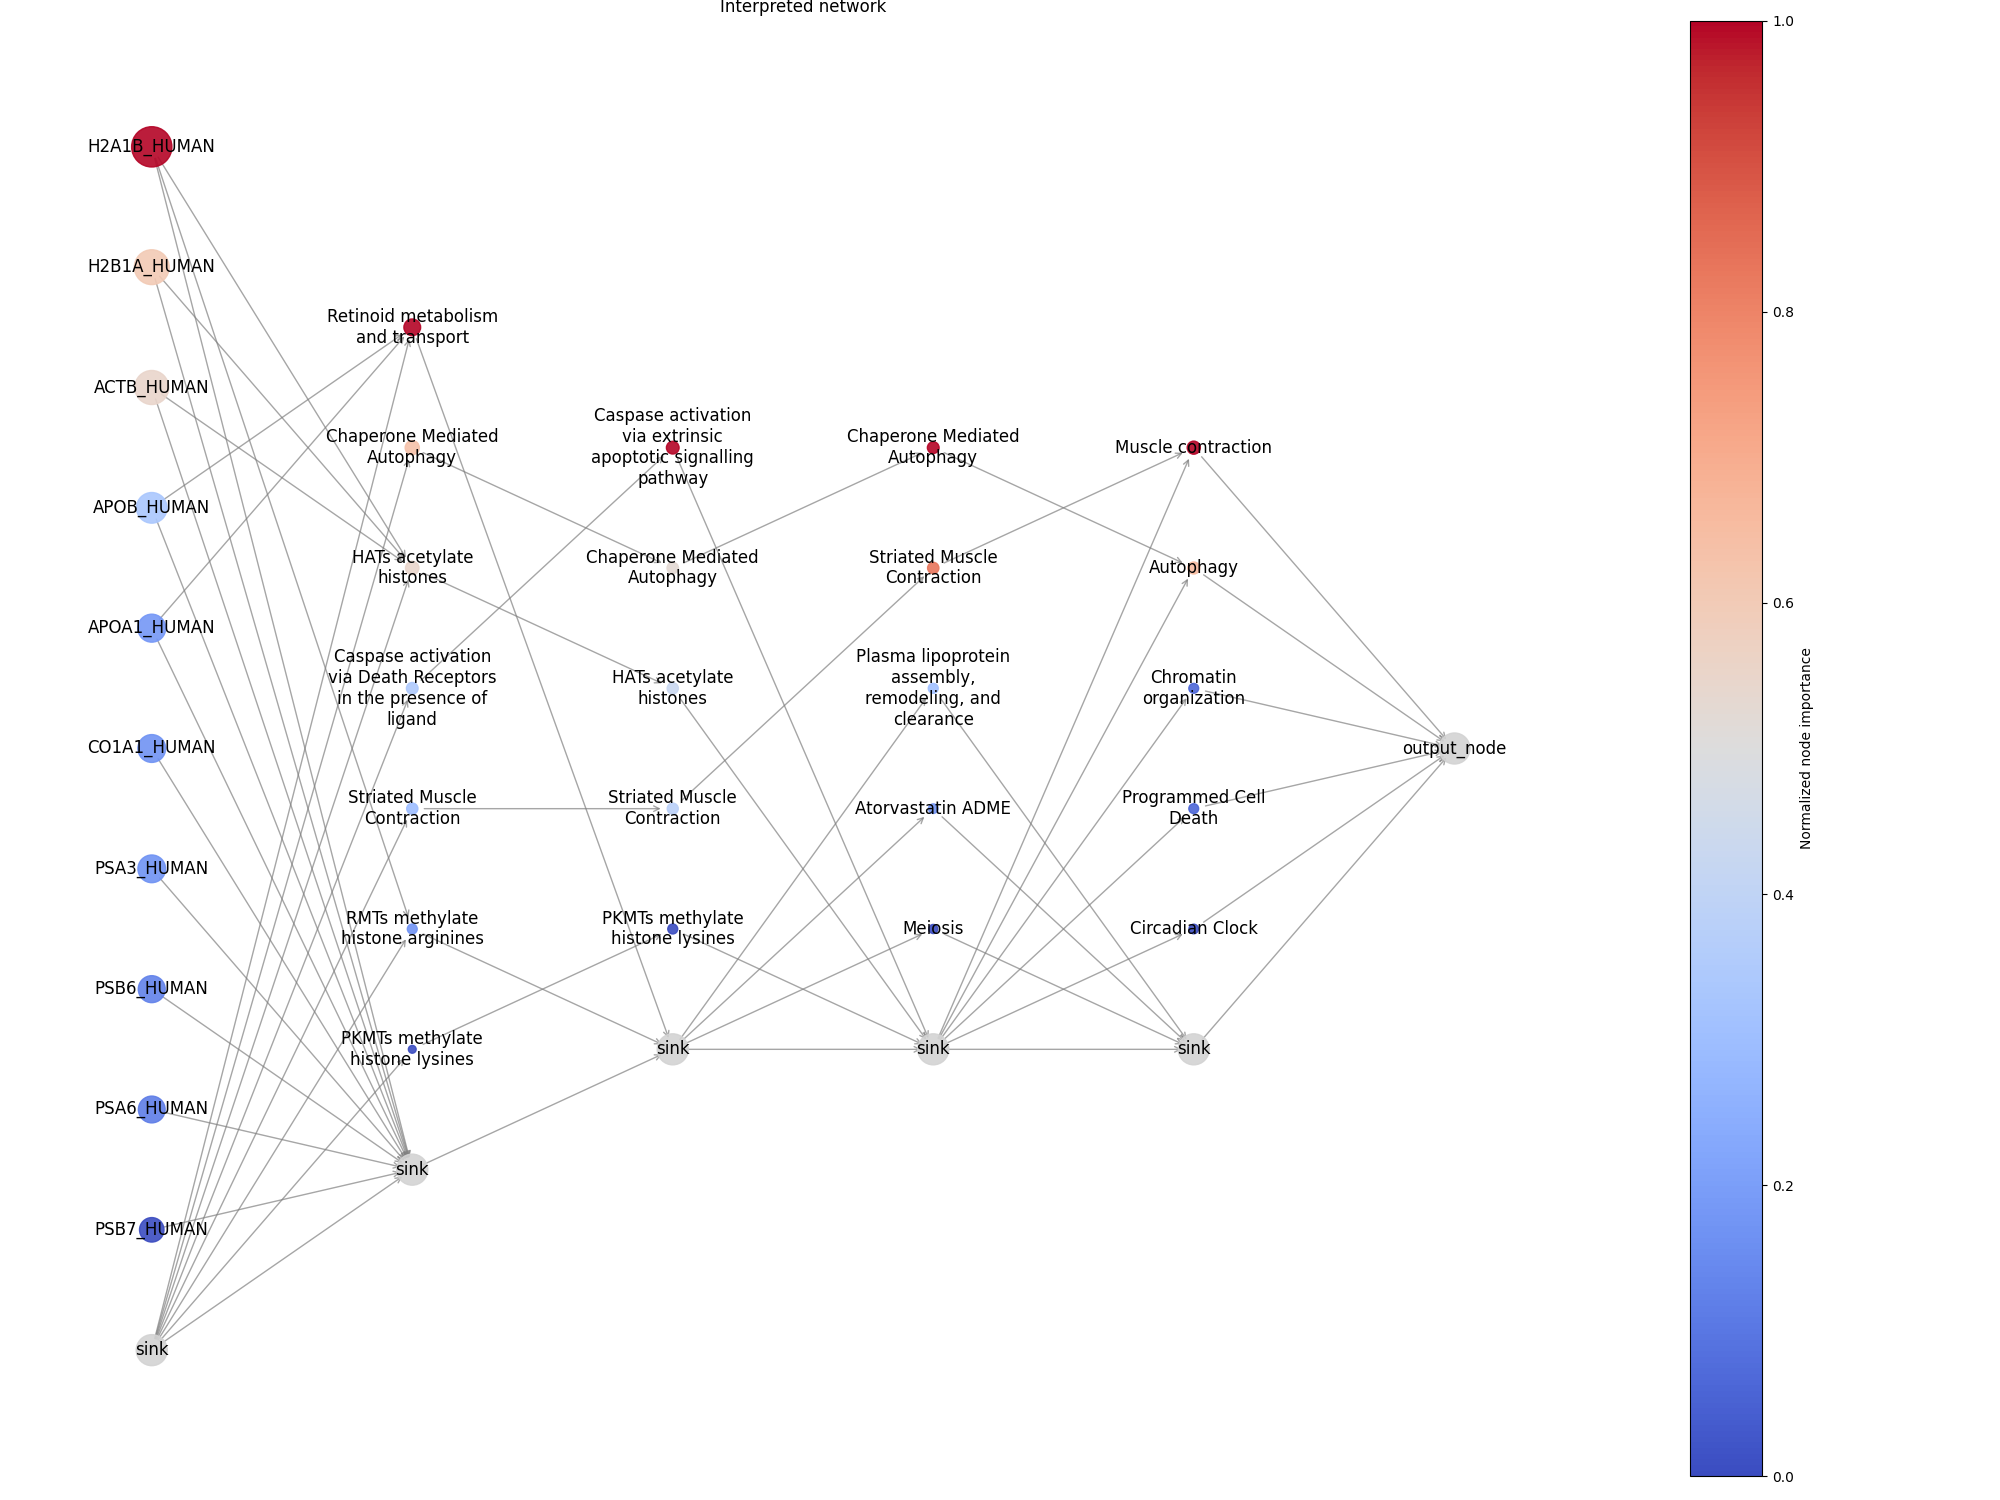

## 🧭 Quick AI Warm-up: Biologically Informed Neural Networks (≈10 min)

Use your AI assistant to ask and summarize answers to these **basic questions**.  
👉 Goal: build a simple mental map before the computer lab.

1. What is a Biologically Informed Neural Network (BINN), and how does it differ from a standard neural network?  

2. What types of biological graphs (e.g., pathways, ontologies) can be used to build a BINN?  

3. Why is interpretability important in applying neural networks to biological data?  

4. What are SHAP values, and how are they used to interpret BINNs?  

5. Give one example of a potential application of BINNs in single-cell or omics analysis.  

### Instructions

* Spend about **1–2 minutes per question**.  
* Write down a **short 1-sentence summary** for each.

`⭐ Edit this cell to write your answers below:`

1.

2.

3.

4.

5.

---

## Install the BINN package from Github

After you have installed the package, you need to restart the runtime to use it.

`Runtime` -> `Restart session` -> `Yes`

In [ ]:
import os

# Target installation path
target_path = "/content/drive/MyDrive/DDLS-Course/Module5/BINN"

# Install the BINN package from GitHub
if not os.path.exists(target_path):
    print("Downloading BINN...")
    !git clone --single-branch --branch main https://github.com/InfectionMedicineProteomics/BINN.git "{target_path}"
else:
    print("BINN is already downloaded at:", target_path)

print("Installing BINN...")
!pip install -q -e "{target_path}"


<img src="https://raw.githubusercontent.com/InfectionMedicineProteomics/BINN/main/docs/img/data_explanation.png" height="300" align="right" style="height:240px">

## Load your data

The BINN takes 4 files:
1. Your data matrix
2. Your design matrix
3. A pathways file to build the network.
4. A mapping between the input format and the pathway format.

Instead of providing 3 and 4, you can use pre-loaded pathway files. BINN currently supports input in the format of UniProt IDs or miRBase and the Reactome pathway database for the underlying structure.

In [ ]:
import os
import pandas as pd

from binn.model.util import load_reactome_db


# @markdown ## Data matrix
# @markdown #### Full file path to your data matrix file
data_matrix_path = "/content/drive/MyDrive/DDLS-Course/Module5/BINN/binn/data/sample_datamatrix.csv" # @param {type:"string"}

# @markdown #### Entity column in data matrix.  This should match the header in your data file.
entity_column = "Protein"  # @param {type:"string"}

# @markdown ---
# @markdown ## Design matrix
# @markdown #### Full file path to your design matrix file
design_matrix_path = "/content/drive/MyDrive/DDLS-Course/Module5/BINN/binn/data/sample_design_matrix.tsv" # @param {type:"string"}

# @markdown #### Sample and group columns in design matrix. This should match the header in your design file.
sample_column = "sample"  # @param {type:"string"}
group_column = "group"  # @param {type:"string"}

# @markdown ---
# @markdown ## Pathways
# @markdown #### Default `reactome` pathways or full file path to custom pathways file
pathways_source = "reactome"  # @param {type:"string"}

# @markdown #### Source and target columns in pathways file. This should match the header in your pathways file.
source_column = "source"  # @param {type:"string"}
target_column = "target"  # @param {type:"string"}

# @markdown ---
# @markdown ## Mapping
# @markdown #### Dafault `uniprot` or `mirbase` mapping or full file path to custom mapping file
mapping_source = "uniprot"  # @param {type:"string"}

# @markdown #### Input and translation columns in mapping file. This should match the header in your mapping file.
input_column = "input"  # @param {type:"string"}
translation_column = "translation"  # @param {type:"string"}

# @markdown ---
# @markdown ## Results directory
result_dir = "/content/drive/MyDrive/DDLS-Course/Module5/results"  # @param {type:"string"}
result_dir = result_dir.rstrip("/")
os.makedirs(result_dir, exist_ok=True)


def read_file(file_path):
  """Read a CSV or TSV file from the given path."""
  if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")
  
  if file_path.endswith(".tsv"):
    return pd.read_csv(file_path, sep="\t")
  elif file_path.endswith(".csv"):
    return pd.read_csv(file_path)
  else:
    # Try to read as CSV by default
    return pd.read_csv(file_path)

# Load data matrix and design matrix
print(f"Loading data matrix from: {data_matrix_path}")
datamatrix = read_file(data_matrix_path)
print(f"Data matrix loaded with shape: {datamatrix.shape}")

print(f"Loading design matrix from: {design_matrix_path}")
designmatrix = read_file(design_matrix_path)
print(f"Design matrix loaded with shape: {designmatrix.shape}")

# Load mapping and pathways
if mapping_source in ["uniprot", "mirbase"]:
    if pathways_source != "reactome":
      raise ValueError("Built-in input sources 'uniprot' and 'mirbase' require 'reactome' as pathways source.")

    print("Loading built-in Reactome mapping and pathways files...")
    reactome_db = load_reactome_db(input_source=mapping_source)
    pathways = reactome_db["pathways"]
    mapping = reactome_db["mapping"]
else:
  # Load custom mapping and pathways files
  print(f"Loading custom pathways file from: {pathways_source}")
  pathways = read_file(pathways_source)
  print(f"Custom pathways file loaded with shape: {pathways.shape}")

  print(f"Loading custom mapping file from: {mapping_source}")
  mapping = read_file(mapping_source)
  print(f"Custom mapping file loaded with shape: {mapping.shape}")
  

# Validate required columns in matrices
def validate_columns(df, required_cols, df_name):
    """
    Check if required columns exist in the DataFrame.
    Raise ValueError if any are missing.
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(
            f"Missing columns {missing} in {df_name}. "
            f"Columns found: {list(df.columns)}"
        )
    print(f"All required columns found in {df_name}: {required_cols}")
    
validate_columns(datamatrix, [entity_column], "data matrix")
validate_columns(designmatrix, [group_column, sample_column], "design matrix")
validate_columns(pathways, [source_column, target_column], "pathways")
validate_columns(mapping, [input_column, translation_column], "mapping")

### ⭐ **Task:** Explore the 4 data files needed to run the BINN.

Before moving on, take a few minutes to explore the 4 matrices/tables (`datamatrix`, `designmatrix`, `mapping`, and `pathways`) you just loaded.
Answer the following questions by running Python commands in the notebook:

1. What type of Python objects are the 4 matrices/tables? Hint: use the `type()` function.
2. What are the dimensions of the 4 matrices/tables? Hint: use the `.shape` attribute.
3. What columns do the 4 matrices/tables have? Which columns are required and for what purpose? Hint: use the `.columns` attribute.
4. What type of data do the 4 matrices/tables contain?
5. Explain the purpose of each of the 4 matrices/tables in one sentence.

In [ ]:
# ⭐ Write your code to explore the 4 matrices/tables here

`⭐ Edit this cell to write your answers below:`

1.
2.
3.
4.
5.

## Configure the BINN

In [ ]:
# @markdown ### BINN options

n_layers = 4  # @param {type:"integer"}
n_outputs = 2  # @param {type:"integer"}
activation = "tanh" # @param

# @markdown ---
# @markdown ### Training options

num_epochs = 50  # @param {type:"integer"}
batch_size = 32  # @param {type:"integer"}
validation_split = .2  # @param {type:"slider", min:0, max:1, step:0.01}

## Initialize and train the BINN

Please refer to the [BINN documentation](https://infectionmedicineproteomics.github.io/BINN/) for more details on the parameters:
* [BINN](https://infectionmedicineproteomics.github.io/BINN/reference/binn_ref/)
* [BINNDataLoader](https://infectionmedicineproteomics.github.io/BINN/reference/dataloader_ref/)
* [BINNTrainer](https://infectionmedicineproteomics.github.io/BINN/reference/explain_ref/)

In [ ]:
from binn import BINN, BINNDataLoader, BINNTrainer

binn = BINN(
  data_matrix=datamatrix,
  mapping=mapping,  # DataFrame: Describes how each input feature maps into the pathway graph
  pathways=pathways,  # DataFrame: Describes the edges among pathway nodes
  device="cpu",
  n_outputs=n_outputs,
  n_layers=n_layers,
  activation=activation,
  input_col=input_column,
  target_col=target_column,
  entity_col=entity_column,
  source_col=source_column,
  translation_col=translation_column
)


binn_dataloader = BINNDataLoader(binn)

dataloaders = binn_dataloader.create_dataloaders(
    data_matrix=datamatrix,  # DataFrame: Raw data matrix with features as rows, samples as columns
    design_matrix=designmatrix,  # DataFrame: Contains group and sample identifiers
    feature_column=entity_column,
    group_column=group_column,
    sample_column=sample_column,
    batch_size=batch_size,
    validation_split=validation_split,
)

# Initialize the trainer
trainer = BINNTrainer(binn)

# Train the model
trainer.fit(dataloaders=dataloaders, num_epochs=num_epochs)

### ⭐ **Task:** Analyze the trained BINN architecture.

Now that you've trained your BINN model, take a few minutes to explore its architecture and learned parameters.
Answer the following questions by running Python commands in the notebook:

1. How many layers does the trained BINN have in total? Hint: examine the `binn` object structure.
2. What are the input and output dimensions of each layer in the network? Hint: look at the `Linear` layers' `in_features` and `out_features`.
3. What activation functions are used between the layers?
4. What is the purpose of BatchNorm and Dropout layers in this architecture, and what are their parameter values?
5. How many trainable parameters does the entire BINN model have? Hint: use `sum(p.numel() for p in binn.parameters() if p.requires_grad)`.
6. How many model weights in each layer are set to set to zero in the BINN? Why is this the case? Hint: you get the weights with `layer.weight.data` where `layer` is a `torch.nn.Linear`.

In [ ]:
# ⭐ Write your code to explore the the `binn` object here

`⭐ Edit this cell to write your answers below:`

1.
2.
3.
4.
5.
6.

## Explain the BINN Model

Please refer to the [BINN documentation](https://infectionmedicineproteomics.github.io/BINN/) for more details on the parameters:
* [BINNExplainer](https://infectionmedicineproteomics.github.io/BINN/reference/explain_ref/)

In [ ]:
# @markdown ### Explainer options

single_or_average = "single"  # @param ["single", "average"]
normalization_method = "fan"  # @param ["subgraph", "fan"]

# @markdown ---
# @markdown ### Options for average explainer
n_iterations = 3  # @param {type:"integer"}
num_epochs_explain = 50 # @param {type:"integer"}

# @markdown ---

# @markdown ### Output file name
job_name = "binn_explanations" # @param {type:"string"}

In [ ]:
from binn import BINNExplainer

explainer = BINNExplainer(binn)

if single_or_average == "average":
  explanations = explainer.explain(
      dataloaders,
      nr_iterations=n_iterations,
      trainer=trainer,
      num_epochs=num_epochs_explain,
      normalization_method=normalization_method
  )
else:
  explanations = explainer.explain_single(dataloaders, split=None, normalization_method=normalization_method)


explanations.to_csv(f"{result_dir}/{job_name}.csv")


## Visualize the BINN Model

In [ ]:
from binn.plot.network import visualize_binn

layer_specific_top_n = {"0": 10, "1": 7, "2": 5, "3": 5, "4": 5}

plt = visualize_binn(
    explanations,
    top_n=layer_specific_top_n,
    plot_size=(20, 10),
    sink_node_size=500,
    node_size_scaling=200,
    edge_width=1,
    node_cmap="coolwarm"
)

plt.title("Interpreted network")
plt.show()

### ⭐ **Task:** Explore and analyze the BINN explanation results.

Now that you have generated explanations for your trained BINN model and created visualizations, it's time to thoroughly understand and analyze what the model has learned.

**Part 1: Understanding the Data and Visualizations**
First, examine the `explanations` DataFrame and the network visualization generated above. Make sure you understand:
- What each column in the explanations DataFrame represents
- How the importance scores are calculated and what they mean biologically
- What the network visualization shows and how to interpret it
- The structure of connections between different layers

**Part 2: Original Analysis and Visualization**
After understanding the existing results, create your own analysis by:
1. **Custom Analysis**: Design and implement one novel analysis of the importance scores (e.g., pathway ranking, layer-specific patterns, class-specific differences, etc.)
2. **Custom Visualization**: Create one original visualization function to display insights from the importance scores

**Inspiration**: For ideas on what to analyze, refer to the [paper](https://www.nature.com/articles/s41467-023-41146-4) results, specifically Figures 3-6, which show various ways to analyze and visualize pathway importance and model explanations.

Use the code cells below for your exploration and analysis.

In [ ]:
# ⭐ Part 1: Examine the explanations DataFrame and understand the data structure

# Start by exploring the explanations DataFrame:
# explanations.head()
# explanations.shape
# explanations.describe()
# explanations.columns
# explanations.info()

# Understand the structure:
# explanations['source_layer'].unique()
# explanations['target_layer'].unique()
# explanations['class_idx'].unique()

# Look at patterns:
# explanations.groupby(['source_layer', 'target_layer']).size()
# explanations.sort_values(by="normalized_importance", ascending=False).head(10)

# Examine the network visualization above and make sure you understand what it shows

In [ ]:
# ⭐ Part 2: Your custom analysis and visualization

# 1. CUSTOM ANALYSIS: Design your own analysis of the importance scores
# Ideas: pathway ranking, class differences, layer-specific patterns, etc.
# Example framework:
# def analyze_pathway_importance(explanations):
#     """Your custom analysis function"""
#     # Your analysis code here
#     return results

# 2. CUSTOM VISUALIZATION: Create your own visualization function
# Ideas: heatmaps, bar plots, network graphs, distribution plots, etc.
# Example framework:
# def visualize_importance_patterns(explanations):
#     """Your custom visualization function"""
#     import matplotlib.pyplot as plt
#     # Your visualization code here
#     plt.show()

# Implement and run your analysis and visualization:

### ⭐ **Your Analysis Results and Interpretations:**

**Part 1: Understanding the Data and Visualizations**
*Describe what you learned from examining the explanations DataFrame and the network visualization:*
- What do the different columns represent?
- What patterns did you observe in the importance scores?
- How do you interpret the network visualization?

**Part 2: Your Custom Analysis and Visualization**
*Describe your custom analysis and visualization:*
- What specific analysis did you design and why?
- What insights did your custom analysis reveal?
- How does your visualization help interpret the results?
- What biological conclusions can you draw?

**Overall Biological Insights:**
*Summarize your key findings:*
- Which pathways or biological processes are most important for the classification?
- How do your results compare to what you might expect biologically?
- Any surprising findings that warrant further investigation?

**Your response:**

[Double-click to edit this cell and write your detailed analysis]

*****

# Part II — MCP + Gemini CLI

Now that you are familiar with BINNs, the data they need and the results they produce, you will create MCP tools both from the `binn` functions and your own analysis functions. You will then use the Gemini CLI to run these tools.

You can choose to just demonstrate them on the current example data files, **OR** download a new prostate cancer dataset and run them on that.

Take a look at the [module 5 lab page](https://ddls.aicell.io/course/ddls-2025/module-5/lab/) for more information on the MCP tools.


### Download the data (optional)

To download the prostate cancer data, run the following cell:

In [ ]:
!pip install gdown
!gdown --id 17nssbdUylkyQY1ebtxsIw5UzTAd0zxWb -O prostate_dataset.zip
!unzip prostate_dataset.zip -d /content/drive/MyDrive/DDLS-Course/Module5/
!rm prostate_dataset.zip

Refer to the Github repository for more details: https://github.com/marakeby/pnet_prostate_paper

**Data Structure:**

The data contains three folders:
- `genes`: Contains information about the genes, note that this dataset uses HUGO gene symbols instead of UniProt IDs.
- `pathways`: Contains the pathways information.
- `prostate`: Contains the actual data files. Start with the file `preprocessed/P1000_adjusted_TPM.csv`.

### Install `fastmcp` for MCP tool creation

In [ ]:
!pip install fastmcp

### Install VS Code Tunnel

To work on your MCP tools, we recommend to switch to VS Code for better writing and debugging of code. To still use Google Colab's free computing resources while enjoying the benefits of VS Code, you can install the VS Code Tunnel.  This creates a secure connection between your Colab session and your local VS Code application, allowing you to edit files and run code directly within VS Code, while the processing happens in your Colab notebook. In addition, the current notebook already has all necessary packages installed.

Run the command below to install the VS Code Tunnel:

In [ ]:
!curl -Lk 'https://code.visualstudio.com/sha/download?build=stable&os=cli-alpine-x64' --output vscode_cli.tar.gz
!tar -xf vscode_cli.tar.gz

## Start VS Code Tunnel

After downloading the VS Code CLI, you need to click the **Terminal** button in the bottom of this page.

Then, in the terminal, type:
```
./code tunnel
```

Then follow the instructions, use your arrow keys to select `❯ GitHub Account`, then you will see something like:

> To grant access to the server, please log into https://github.com/login/device and use code B6BB-23AA

You should now copy the url and open in a new browser tab, then copy the device code to login, you will need to approve the access to your github account then return to this terminal.

Then you will see something like, and type e.g. `colab` for the name to identify this machine:
> ? What would you like to call this machine? (30d8d79434a3) › colab

After that you should see:
> Open this link in your browser https://vscode.dev/tunnel/colab/content

Now visit the link and you should get the vscode session where you will work on.

> Switch to the Module5 Folder
Open a terminal in VS Code (View -> Terminal). Move working directory to folder on Google Drive and use this folder as your workspace. This is a crucial step.

```
cd /content/drive/MyDrive/DDLS-Course/Module5/
code .
```

**Importantly, please keep the terminal open and the browser tab for google colab active during the whole time.**

To prevent the Colab session from timing out, you can run the code cell below. It will simulate activity every 5 minutes.

In [ ]:
import time
from datetime import datetime

while True:
    # Print something every 5 minutes so Colab sees activity
    now = datetime.now().strftime("%H:%M:%S")
    print(f"✅ Still alive... ({now})")
    time.sleep(300)